In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Capital Bike Share DataFrames
df = pd.read_csv('last_week.csv')

In [ ]:
# Checking the no. of rows and columns in the given DataFrames
df.shape

In [ ]:
# Checking empty cells in the columns for DataFrames
df.isnull().sum()

In [ ]:
# Droping empty rows from the DataFrame
df= df.dropna()

In [ ]:
# Top 5 (by default) for DataFrame with capacity information
df.head()

In [ ]:
# Checking Data Type for the given DataFrames
df.dtypes

In [ ]:
# Checking Data Type for the given DataFrames
type(df['started_at'][0])

In [ ]:
# Convertion 'object' data type for 'started_at' and 'ended_at' columns to Timestamp/datetime64
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [ ]:
# Checking converted data type
type(df['started_at'][0])

In [ ]:
# Set one of the column of dataframe as index using .index function
# Setting 'started_at' column as index
df.index = df['started_at']
df.index

In [ ]:
# Reference: https://stackoverflow.com/questions/51938140/how-to-get-the-time-duration-from-two-date-time-columns-of-pandas-dataframe
# Option-1: Finding the duration of trip.

#df['duration_min'] = (df['ended_at']-df['started_at']).apply(lambda x: x.seconds/(60))

In [ ]:
# Option-2: Finding the duration of trip. Using Numpy 'timedelta64' function. 
# Reference: https://numpy.org/doc/stable/reference/arrays.datetime.html

df['duration_hr'] = (df['ended_at']-df['started_at'])/np.timedelta64(1,'h')
df['duration_hr'] = df['duration_hr'].round(2)


In [ ]:
df = df.sort_index()
df

In [ ]:
# Sorting the values according to the date

#df.sort_values(by=['duration_hr'], ascending=False)

In [ ]:
# Slice data for specific day/time using index column
df.loc['2021-06-25']

In [ ]:
# Counting the no. of rides for the busiest stations
df.loc['2021-06-22' : '2021-06-22'].groupby('start_station_name').count()['rideable_type'].sort_values(ascending=False)

In [ ]:
# Plotting no. of rides for 5 stations
df.loc['2021-06-22' : '2021-06-22'].groupby(['start_station_name']).count()['rideable_type'].sort_values(ascending=False)[:5].plot(kind='bar')

In [ ]:
# Slicing for the time duration
# Limitation: Only applicable to the same day. If the day is not the same than it will take the values out of the desired time duration

df.loc['2021-06-21 10:00:00' : '2021-06-21 12:00:00',:]

In [ ]:
# Adding columns for hour and day name in DataFrame

df.loc[:,'hour'] = df['started_at'].dt.hour
df.loc[:,'DAY'] = df['started_at'].dt.day
df.loc[:,'weekday'] = df['started_at'].dt.day_name()

In [ ]:
df

In [ ]:
# Plotting Bike rides vs time for members and casual users

sns.set(rc={'figure.figsize':(17.0,8.27)})

df_mem_cal = df.groupby(['hour', 'member_casual']).count()['ride_id'].reset_index()

sns.lineplot(data= df_mem_cal, x='hour', y='ride_id', hue='member_casual')

In [ ]:
sns.barplot(x='hour', y='ride_id', data=df_mem_cal, hue='member_casual', dodge=True)

In [ ]:
# Weekday vs number of rides for members and casual users

sns.countplot(x='weekday', data=df, hue='member_casual', dodge=True)

In [ ]:
# No. of rides vs total no. of rides for weekdays
df_wk = df.groupby(['hour', 'weekday']).count()['ride_id'].reset_index()

sns.lineplot(data=df_wk, x='hour', y='ride_id', hue='weekday')

In [ ]:
df_wk.sort_values(by=['ride_id', 'weekday'], ascending=False)

In [ ]:
# Plotting top-5 stations rides vs time 

df_top = df.groupby(['hour', 'start_station_name']).count()['ride_id'].reset_index()

sns.lineplot(data=df_top, 
            x='hour', y='ride_id', hue='start_station_name', 
            hue_order= df.start_station_name.value_counts().iloc[:3].index)

#Lincoln Memorial                                         622
#Jefferson Dr & 14th St SW                                602
#4th St & Madison Dr NW                                   533
#Henry Bacon Dr & Lincoln Memorial Circle NW              526
#Smithsonian-National Mall / Jefferson Dr & 12th St SW    502

In [ ]:
# BAR plot for top-5 stations rides vs time

sns.barplot(x='hour', y='ride_id', hue='start_station_name', data=df_top,  
            hue_order= df.start_station_name.value_counts().iloc[:3].index, dodge=True)

In [ ]:
# Trip duration for top stations w.r.t no. of rides

df_dur = df[df['duration_hr'] <= 1].groupby(['duration_hr', 'start_station_name']).count()['ride_id'].reset_index()

sns.lineplot(data=df_dur, x='duration_hr', y='ride_id', hue='start_station_name', 
             hue_order= df.start_station_name.value_counts().iloc[:2].index)

In [ ]:
#fig, ax = plt.subplots(1,1)

lm = sns.barplot(x='duration_hr', y='ride_id', hue='start_station_name', data=df_dur,  
            hue_order= df.start_station_name.value_counts().iloc[:2].index, dodge=True)

#axes = lm.axes
#axes.set_xlim(0,5)

#plt.xlim(0, 30)

#plt.xticks(df_dur['duration_hr'][::5])    # set here, ticks at step of 50
#plt.show()

plt.xticks([0,0.4,0.8,1.0]);

# Resampling
For controlling data visualisation w.r.t Time

In [ ]:
df.loc[:, 'values'] = 1

In [ ]:
df

In [ ]:
sns.lineplot(data=df.loc['2021-06-21 6:00':'2021-06-23 12:00'].resample('15T').count()['member_casual'])

In [ ]:
df.loc['2021-06-21 6:00':'2021-06-22 12:00']

In [ ]:
sns.lineplot(data=df.loc['2021-06-21':'2021-06-27'].resample('30T').count()['member_casual'])

# Key Performance Index (KPI)


<AxesSubplot:xlabel='started_at'>

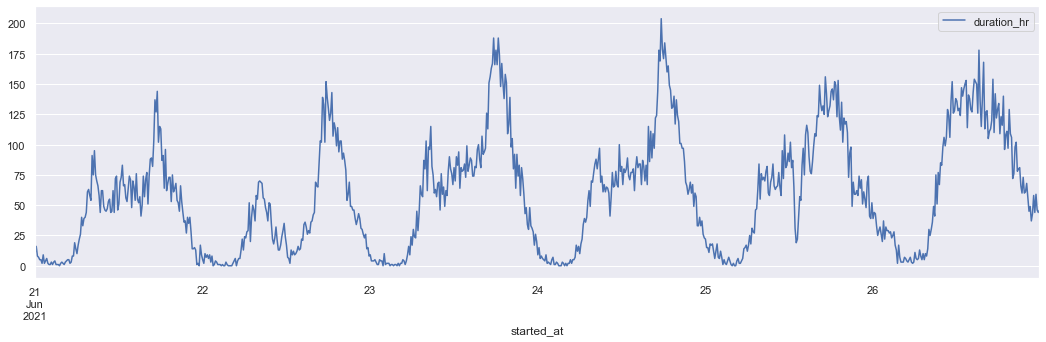

In [410]:
# Trip duration
# Counting no. of rides w.r.t trip duration

df[['duration_hr']].loc['2021-06-21' : '2021-06-26'].resample('10T').count().plot(figsize=(18,5))

<AxesSubplot:xlabel='started_at'>

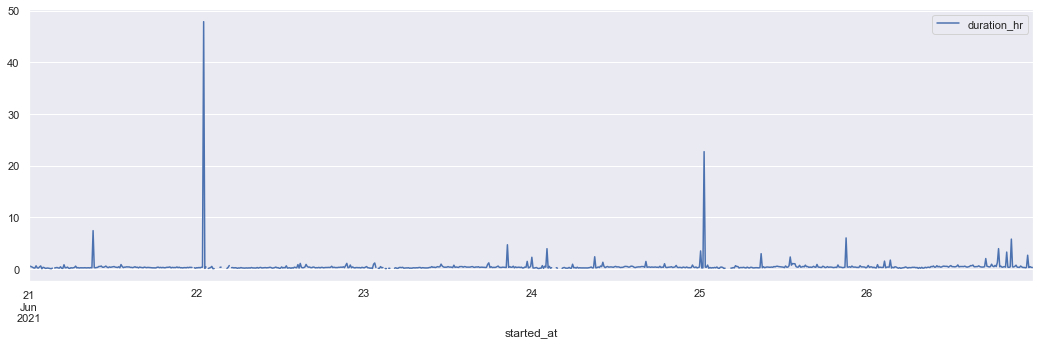

In [446]:
# Trip duration
# Average ride duration w.r.t trip duration

df[['duration_hr']].loc['2021-06-21' : '2021-06-26'].resample('10T').mean().plot(figsize=(18,5))

In [447]:
df[['duration_hr']].loc['2021-06-21' : '2021-06-21'].resample('2H').mean()

,duration_hr
started_at,
2021-06-21 00:00:00,0.355789
2021-06-21 02:00:00,0.164286
2021-06-21 04:00:00,0.205270
2021-06-21 06:00:00,0.245740
2021-06-21 08:00:00,0.751598
2021-06-21 10:00:00,0.391659
2021-06-21 12:00:00,0.385716
2021-06-21 14:00:00,0.330956
2021-06-21 16:00:00,0.262212


In [ ]:
# DataFrame for Trip duration w.r.t Time of the day

#df_dur_hr = df[df['duration_hr'] <= 0.5].groupby(['hour', 'duration_hr', 'start_station_name']).count()['ride_id'].reset_index()
#df_dur_hr

In [404]:
# Finding Key Performance Indicator (KPI)
# DataFrame, frequently used stations trip duration for the rides
# Start station, End station, no. of rides, member/casual

df_kpi = df.groupby(['hour', 'start_station_name', 'end_station_name', 'member_casual', 'duration_hr', 'weekday']).count()['ride_id'].sort_values(ascending=False).reset_index()
df_kpi

,hour,start_station_name,end_station_name,member_casual,duration_hr,weekday,ride_id
0,14,Columbus Circle / Union Station,4th St & Madison Dr NW,casual,0.24,Monday,6
1,17,7th & F St NW / National Portrait Gallery,Constitution Ave & 2nd St NW/DOL,casual,0.49,Wednesday,5
2,22,California St & Florida Ave NW,18th St & Wyoming Ave NW,member,0.03,Monday,5
3,8,Virginia Ave & 25th St NW,14th & G St NW,member,0.16,Wednesday,5
4,22,Maine Ave & 7th St SW,Maine Ave & 9th St SW,member,0.02,Thursday,5
...,...,...,...,...,...,...,...
48629,13,15th & W St NW,13th & U St NW,casual,0.08,Thursday,1
48630,13,15th & W St NW,14th & Otis Pl NW,member,0.16,Saturday,1
48631,13,15th & W St NW,15th & P St NW,member,0.10,Saturday,1
48632,13,15th & W St NW,17th & Corcoran St NW,member,0.07,Saturday,1


In [405]:
# Finding Key Performance Indicator (KPI)
# Starting station equals to the end stations for max. no. of rides

df_kpi.loc[df_kpi['start_station_name'] == df_kpi['end_station_name'], :]


,hour,start_station_name,end_station_name,member_casual,duration_hr,weekday,ride_id
5,17,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,casual,0.31,Saturday,4
24,22,Lincoln Memorial,Lincoln Memorial,casual,0.34,Friday,3
27,22,19th & G St NW,19th & G St NW,member,0.01,Saturday,3
45,19,15th St & Constitution Ave NW,15th St & Constitution Ave NW,casual,0.36,Friday,3
57,14,3rd & H St NE,3rd & H St NE,casual,0.44,Friday,3
...,...,...,...,...,...,...,...
48557,13,15th & P St NW,15th & P St NW,member,0.32,Monday,1
48583,13,15th & K St NW,15th & K St NW,casual,1.12,Monday,1
48592,13,15th St & Constitution Ave NW,15th St & Constitution Ave NW,casual,0.00,Saturday,1
48593,13,15th St & Constitution Ave NW,15th St & Constitution Ave NW,casual,0.40,Thursday,1


In [ ]:
a= df_kpi.loc[df_kpi['start_station_name'] == df_kpi['end_station_name'], :].groupby(['member_casual']).sum()['ride_id']
a

In [ ]:
type(a)

<AxesSubplot:xlabel='member_casual'>

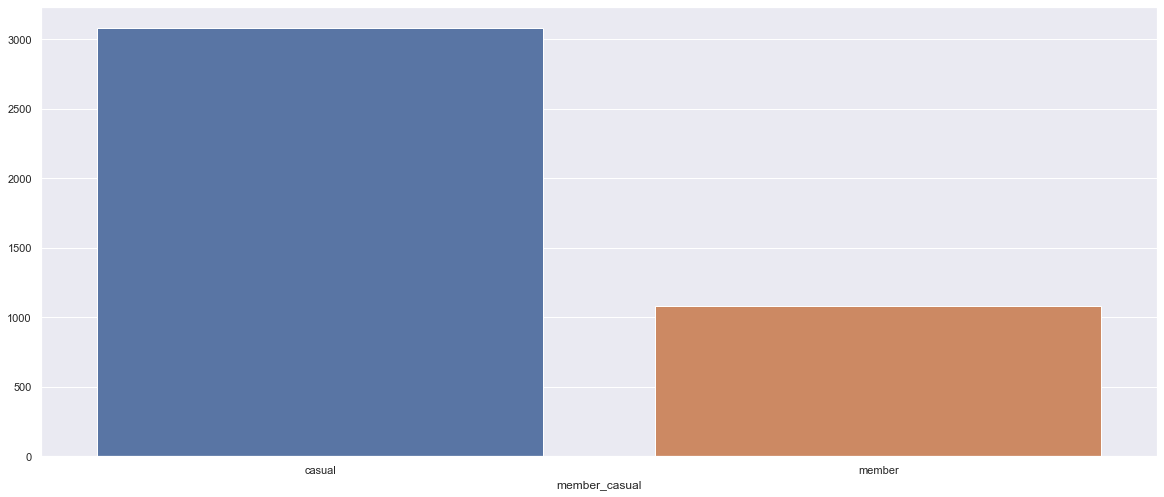

In [409]:
# Plotting 
sns.barplot(x=a.index, y=a.values)

In [407]:
# Finding Key Performance Indicator (KPI)
# Starting station is not the same as the end stations

df_kpi.loc[df_kpi['start_station_name'] != df_kpi['end_station_name'], :]

,hour,start_station_name,end_station_name,member_casual,duration_hr,weekday,ride_id
0,14,Columbus Circle / Union Station,4th St & Madison Dr NW,casual,0.24,Monday,6
1,17,7th & F St NW / National Portrait Gallery,Constitution Ave & 2nd St NW/DOL,casual,0.49,Wednesday,5
2,22,California St & Florida Ave NW,18th St & Wyoming Ave NW,member,0.03,Monday,5
3,8,Virginia Ave & 25th St NW,14th & G St NW,member,0.16,Wednesday,5
4,22,Maine Ave & 7th St SW,Maine Ave & 9th St SW,member,0.02,Thursday,5
...,...,...,...,...,...,...,...
48629,13,15th & W St NW,13th & U St NW,casual,0.08,Thursday,1
48630,13,15th & W St NW,14th & Otis Pl NW,member,0.16,Saturday,1
48631,13,15th & W St NW,15th & P St NW,member,0.10,Saturday,1
48632,13,15th & W St NW,17th & Corcoran St NW,member,0.07,Saturday,1


In [406]:
b= df_kpi.loc[df_kpi['start_station_name'] != df_kpi['end_station_name'], :].groupby(['member_casual']).sum()['ride_id']
b

member_casual
casual    19161
member    27302
Name: ride_id, dtype: int64

In [408]:
df_kpi = df.groupby(['hour', 'start_station_name', 'end_station_name', 'member_casual', 'duration_hr', 'weekday']).count()['ride_id'].sort_values(ascending=False).reset_index()